In [1]:
import numpy as np
# import cv2
import tifffile as tiff
from shapely.geometry import Polygon, mapping, shape, box
from skimage import io
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
# import json
from rasterio import features
import scanpy as sc
import pandas as pd
import geopandas as gpd

import pickle
import scipy

import math

from ast import literal_eval

import seaborn as sns

from SGanalysis.SGobject import SGobject
from adjustText import adjust_text

import matplotlib
%matplotlib inline
# matplotlib.use('Qt5Agg')
# %matplotlib qt

from sklearn.cluster import AgglomerativeClustering as AggCluster

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import sys
import os

# tools_path  = '/Users/grantkinsler/Documents/Penn/Research/SpatialBarcodes/SpatialBarcodes/analysis/tools/tools.py'

tools_path  = '/Users/grantkinsler/Documents/Penn/Research/SpatialBarcodes/analysis/tools/tools.py'

# /Users/grantkinsler/Documents/Penn/Research/SpatialBarcodes/analysis/tools/tools.py
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools as tools

In [2]:

import math 

def collision_rate(n_bcs,n_cells,bc_library_size = 96):

    number_of_combos = math.comb(bc_library_size,n_bcs)

    prob_of_collision = 1 - (1 - (1/number_of_combos))**(n_cells-1)

    return prob_of_collision



Text(0, 0.5, 'Avg. number of collisions')

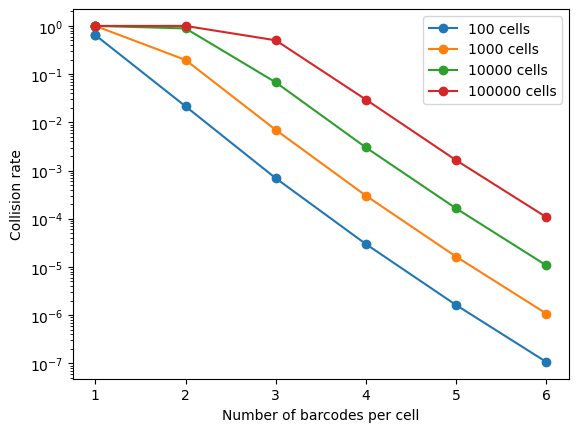

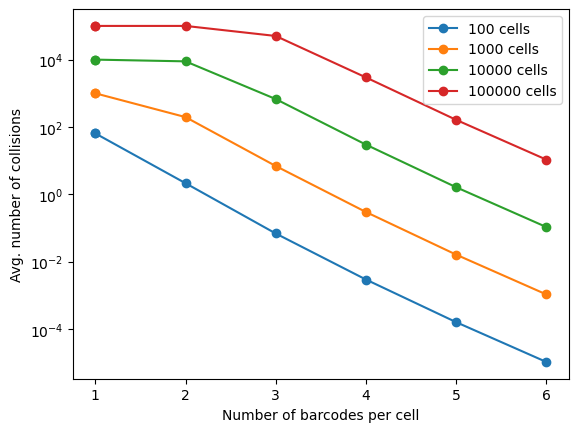

In [12]:
x = np.linspace(1,6,7)
x = [int(i) for i in x]

n_cell_list = [100,1000,10000,100000]

for n_cells in n_cell_list:
    
    y = [collision_rate(i,n_cells) for i in x]
    
    plt.plot(x,y,label = f'{n_cells} cells',marker='o')
plt.yscale('log')
plt.legend()
plt.xlabel('Number of barcodes per cell')
plt.ylabel('Collision rate')

plt.figure()
for n_cells in n_cell_list:
    
    y = [n_cells*collision_rate(i,n_cells) for i in x]
    
    plt.plot(x,y,label = f'{n_cells} cells',marker='o')
plt.yscale('log')
plt.legend()
plt.xlabel('Number of barcodes per cell')
plt.ylabel('Avg. number of collisions')

In [13]:
collision_rate(3,15000)

0.0996543836140048

In [16]:
collision_rate(4,15000)

0.004504928451042334

In [4]:
collision_rate(3,1398)

0.009729825773800549

In [5]:
collision_rate(4,1398)

0.0004204465158157422